# Exam
## Teterina Ekaterina

2. Python, 25 points max
Write a Python function which checks if an integer is some power of another integer.
Please don’t use any standard module/library/
For example:
 is_power(16,2)           returns true, because 16 is the 4th power of 2
 is_power(12,2)           returns false
 is_power(100000,10) returns true, because 100000 is 105.
 is_power(990,9)         returns false

What’s the time complexity for this function?

Go to GitHub, to my public repo https://github.com/AleksBulatov/MyProject/
Find there the task2.py file, take it to your local environment
Remove its content and fill it with your python code.
Send me a pull request, so I’ll be able to make a revision of your code.


In [41]:
def if_power(x, a):
    if x == 1:
        return True
    if x == 0:
        return a == 0
    if a == 1:
        return x == 1
    
    while x >= a:
        if x % a != 0:
            return False
        x //= a
    return x == 1

In [44]:
print(if_power(16, 2))
print(if_power(12, 2))
print(if_power(100000,10))
print(if_power(990,9))

True
False
True
False


3. Data Analysis, 25 points max
Create the following DataFrame:
•	student name
•	attendance of the DevEssentials course (in %)
•	mark (in [0..100] points)
Not too long, 5 lines are enough, to save time.
Draw a plot which shows a correlation (if any) between attendance and mark based on the given dataset.


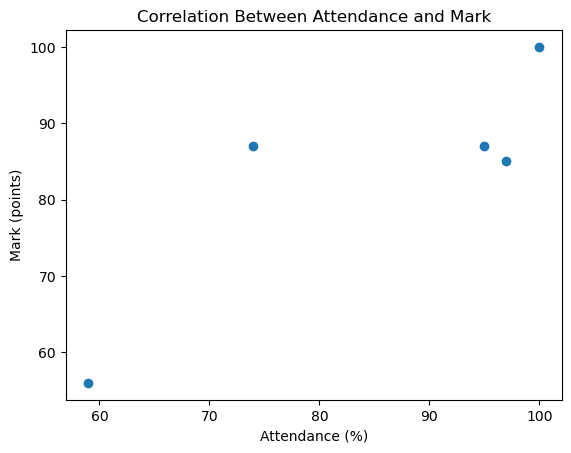

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
  'name': ['Anna', 'Max', 'Kate', 'Dan', 'Vanya'],
  'attendance': [100, 95, 74, 59, 97],
  'mark': [100, 87, 87, 56, 85]
}

df = pd.DataFrame(data)

plt.scatter(df['attendance'], df['mark'])
plt.xlabel('Attendance (%)')
plt.ylabel('Mark (points)')
plt.title('Correlation Between Attendance and Mark')
plt.show()

4. SQL, 25 points max

Department name, Manager Name and Number of employees working in each department. 
Order the output by Department name

In [1]:
!pip install ipython-sql

%load_ext sql

!env | grep POST

import psycopg2

with psycopg2.connect(
    dbname='jovyan'
) as conn:
    with conn.cursor() as cur:
        cur.execute('SELECT datname FROM pg_database')
        records = cur.fetchall()

POSTGRESQL_USER=reader
POSTGRESQL_PASSWORD=Miba2021


In [6]:
%%sql postgresql:///jovyan
SELECT tablename AS table FROM pg_tables WHERE tablename !~ '^(pg_|sql_)'

2 rows affected.


table
employees
departments


In [7]:
%%sql postgresql:///jovyan
SELECT *
FROM employees

12 rows affected.


employee_id,first_name,last_name,hire_date,job_id,manager_id,department_id
100,Steven,King,1987-06-17,AD_PRES,0,90
101,Neena,Kochhar,1987-06-18,AD_VP,100,90
102,Lex,DeHaan,1987-06-19,AD_VP,100,90
103,Alexander,Hunold,1987-06-20,IT_PROG,102,60
107,Diana,Lorents,1987-06-24,IT_ProG,103,60
108,Nancy,Greenberg,1987-06-25,FI_MGR,101,100
109,Daniel,Faviet,1987-06-26,FI_ACCOUNT,108,100
114,Den,Raphaely,1987-07-01,PU_MAN,100,30
118,Guy,Himuro,1987-07-05,PU_CLERK,114,30
144,Peter,Vargas,1987-07-31,ST_CLERK,114,50


In [8]:
%%sql postgresql:///jovyan
SELECT *
FROM departments

10 rows affected.


department_id,department_name,manager_id
10,Administration,200
30,Purchasing,114
40,HumanResources,203
50,Shipping,121
60,IT,103
70,PublicRelations,204
80,Sales,145
90,Executive,100
100,Finance,108
110,Accounting,205


In [13]:
%%sql postgresql:///jovyan
Select Count(employee_id) As number_of_employees, department_name, first_name, last_name
From employees
Join departments Using (department_id)
Group by employees.department_id, employees.manager_id, department_name, first_name, last_name
Order by department_name

12 rows affected.


number_of_employees,department_name,first_name,last_name
1,Executive,Steven,King
1,Executive,Lex,DeHaan
1,Executive,Neena,Kochhar
1,Finance,Nancy,Greenberg
1,Finance,Daniel,Faviet
1,IT,Alexander,Hunold
1,IT,Diana,Lorents
1,Purchasing,Den,Raphaely
1,Purchasing,Guy,Himuro
1,Sales,John,Russell


In [17]:
%%sql postgresql:///jovyan
Select Count(Distinct employee_id) As number_of_employees, department_name, first_name, last_name
From departments
Join employees e Using (department_id)
Join employees e2 (manager_id)
Group by e.department_id, e2.manager_id, department_name, first_name, last_name
Order by department_name

(psycopg2.errors.AmbiguousColumn) common column name "manager_id" appears more than once in left table

[SQL: Select Count(Distinct employee_id) As number_of_employees, department_name, first_name, last_name
From departments
Join employees e Using (department_id)
Join employees e2 Using (manager_id)
Group by e.department_id, e2.manager_id, department_name, first_name, last_name
Order by department_name]
(Background on this error at: https://sqlalche.me/e/20/f405)
